# **Capstone Project: Consumer Insights Data Analytics Externship for Beats by Dre**

## **1. Project Title:** **Consumer Insights Data Analytics Externship of Beats by**
### **Student Name:** **Clément Sampebgo**
### **Date:** **24/07/2024**

```


## **2. Table of Contents**
1. Introduction
2. Data Description
3. Exploratory Data Analysis (EDA)
4. Sentiment Analysis
5. AI-Generated Insights
6. Comparative Analysis
7. Strategic Recommendations
8. Conclusion
9. References

```


- **Importing the necessary frameworks and libraries.**

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import google.generativeai as genai

```


## **3. Introduction**

### **3. 1 Project Overview**

The purpose of this project is to analyze customer reviews of **Beats by Dre products** collected from Amazon to gain insights into consumer sentiment, identify patterns and trends, and offer strategic recommendations. The key objectives are to understand customer satisfaction, compare Beats by Dre with its competitors, and provide actionable insights for product improvement and marketing strategies.


### **3. 2 Background**

**Beats by Dre** is a prominent brand in the audio technology industry, known for its high-quality headphones and earbuds. Understanding consumer sentiment through review analysis is crucial for maintaining competitive advantage and improving customer satisfaction.

```


## **4. Data Description**

### **4. 1 Data Sources**

The dataset comprises customer reviews for Beats by Dre products, scraped from Amazon using Oxylabs. It includes metadata such as ratings, review dates, and review text.

```



### **4. 2 Data Collection**

I collected data by scraping Amazon reviews for **Beats by Dre** products and it's competitors. However, the initial method of scraping data from Amazon.com didn't work due to changes made by Amazon. As a result, I had to use an alternative method involving `Oxylabs`, an online platform for data scraping.

During the scraping process, we encountered another challenge related to the number of pages we could retrieve at a time since we were using the free version of `Oxylabs`. I could retrieve exactly **`10 pages`** of reviews at a time. This meant repeating the process multiple times for different products until we obtained a total of **`1035 reviews`**. Additionally, we struggled with the variability in review formats and ensuring the completeness of the data.

```


### **4. 3 Data Cleaning**
Data cleaning steps included handling missing values, normalizing text, and removing duplicates. Significant decisions involved the exclusion of non-English reviews and the removal of reviews with insufficient text for analysis.

- **Loading & Displaying the Dataset.**

In [ ]:
raw_data_df = pd.read_csv("Reviews_Raw_Data_df.csv")
raw_data_df

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes
0,R3VJHX5IUE1GW0,B09JL41N9C,"5.0 out of 5 stars Good sound, seamless iPhone...",Bobby K - NYC,5,"I like how secure these earphones are, comfort...","Reviewed in the United States June 6, 2024",AFPG4YAKAUOQ6GGBHNKLZ4E3JDBQ,True,12,Color: Beats WhiteStyle: Fit ProSet: Without A...
1,R3O2F0G4RQELXK,B09JL41N9C,5.0 out of 5 stars Movement focused TW earbuds...,Ant,5,My pair of Beats Powerbeats Pros were starting...,"Reviewed in the United States March 8, 2024",AFHZTD2L5OXDW2RC4GDSIBRMAB6A,True,53,Color: Sage GrayStyle: Fit ProSet: Without App...
2,R35IQTO062Y7LU,B09JL41N9C,5.0 out of 5 stars Best wireless noise cancell...,theInternational,5,I am a long-time user of the Bose QuietComfort...,"Reviewed in the United States July 13, 2022",AHJD4656VLR6I3TCW544TITKJBUQ,True,734,Color: Sage GrayStyle: Fit ProSet: Without App...
3,R2LFEEQXQDETXR,B09JL41N9C,4.0 out of 5 stars Good Apple Ecosystem Option...,C. Godby,4,"Before buying the Beats Fit Pro, I've owned th...","Reviewed in the United States February 8, 2023",AHYLFTWLZ5YY5FWN3UBI4YSR3ROQ,True,225,Color: Beats BlackStyle: Fit ProSet: Without A...
4,R2JXCMRVKF84KR,B09JL41N9C,5.0 out of 5 stars Elevating the Listening Exp...,Kailash,5,I recently had the pleasure of trying out the ...,"Reviewed in the United States March 21, 2024",AG77DIMEIWDUUMGCBEAOODGVITPA,True,5,Color: Tidal BlueStyle: Fit ProSet: Without Ap...
...,...,...,...,...,...,...,...,...,...,...,...
1031,R1D6AFLAUH1IKB,B0756CYWWD,4.0 out of 5 stars They’re cool I guess,Yardley Rosas,4,For the price I was low key expecting more so ...,"Reviewed in the United States March 14, 2021",AHS6VSQTRWHC6VYIDYQHUDDUMOJA,True,0,Color: Silver
1032,R139MEJ6IWDKKW,B0756CYWWD,5.0 out of 5 stars Great Seller,Joseph,5,This was exactly what I was looking for and am...,"Reviewed in the United States March 1, 2024",AGCMNX3PAFXARGQTYIWGCQBSQH7Q,True,0,Color: Silver
1033,REEXHGPGJMEMI,B0756CYWWD,2.0 out of 5 stars Bose QuietComfort 35 Series...,VirtualWatts,2,I was looking for a pair of headphones to help...,"Reviewed in the United States February 4, 2019",AGQJUPHOYSRWOZFTRNWUUCQ6TY4Q,True,4,Color: Black
1034,RKAB2RDVHYYCE,B0756CYWWD,5.0 out of 5 stars Excellent noise cancelation.,Timothy Parker,5,I bought these specifically for the noise canc...,"Reviewed in the United States April 22, 2020",AHUEHZ26MDJNOEUDDM7WDBV6W6QQ,True,1,Color: Black


- **Dealing with Missing Values**

In [ ]:
missing_values = raw_data_df.isnull().sum() # I, first check for missing values
missing_values

review_id              0
product_id             0
title                  0
author                 0
rating                 0
content                3
timestamp              0
profile_id             0
is_verified            0
helpful_count          0
product_attributes    61
dtype: int64

In [ ]:
raw_data_df.dtypes # Then, I check the type of data in each colum.

review_id             object
product_id            object
title                 object
author                object
rating                 int64
content               object
timestamp             object
profile_id            object
is_verified             bool
helpful_count          int64
product_attributes    object
dtype: object

We can see that the `content` and `product_attributes` columns are both of type `object.` So, I removed all rows where `content` is null because there are only a few. For the `product_attributes` column, I replaced all missing values with the mode.

In [ ]:
# Make a copy of the row data and then manipulate the copy to remove rows where 'content' is null.
raw_data_df_copy = raw_data_df.copy()
raw_data_df_copy = raw_data_df_copy.dropna(subset = 'content')

In [ ]:
missing_values = raw_data_df_copy.isnull().sum() # Check for missing values again.
missing_values

review_id              0
product_id             0
title                  0
author                 0
rating                 0
content                0
timestamp              0
profile_id             0
is_verified            0
helpful_count          0
product_attributes    61
dtype: int64

In [ ]:
# Now I replaced any missing values in 'product_attributes' with the mode.
mode_product_attributes = raw_data_df_copy['product_attributes'].mode()[0]
raw_data_df_copy['product_attributes'].fillna(mode_product_attributes, inplace = True)

- **Identifying and managing outliers**

In [ ]:
# 1. Identifying outliers
# Selects all columns with numerical data types.
numerical_columns = raw_data_df_copy.select_dtypes(include = [np.number]).columns.tolist()
for column in numerical_columns:
    Q1 = raw_data_df_copy[column].quantile(0.25)  # Finding the first quartile (Q1).
    Q3 = raw_data_df_copy[column].quantile(0.75)  # Finding the third quartile (Q3).
    IQR = Q3 - Q1                                 # Calculate the IQR (Interquartile Range)
lower_bound = Q1 - 1.5 * IQR   # Determine the lower bound
upper_bound = Q3 + 1.5 * IQR   # Determine the upper bound

# 2. Managing outliers
# Replace any value outside the boundaries` with the `closest boundary value`.
raw_data_df_copy[column] = np.where(raw_data_df_copy[column] > upper_bound, upper_bound, raw_data_df_copy[column])
raw_data_df_copy[column] = np.where(raw_data_df_copy[column] < lower_bound, lower_bound, raw_data_df_copy[column])

**I ended the data cleaning process by saving the cleaned dataset into a file named 'cleaned_data_df.csv'.**

In [ ]:
cleaned_data_df = raw_data_df_copy
cleaned_data_df.to_csv('cleaned_data_df.csv', index = False)

```


## **5. Exploratory Data Analysis (EDA)**

### **5. 1 Data Overview**

The dataset consists of **`1,033`**`reviews`.

**Key statistics include:**
- Average rating: **`4.28`**
- Mean sentiment score: **`0.24`**
- Average helpful count: **`1.39`**

### **5. 2 Visualizations**
Key visualizations include:
 - **`histograms`**,
 - **`box plots`**, and
 - **`scatter plots`**.

**Rating Distribution**

**Sentiment Score Distribution:**

In [ ]:
file_path = 'cleaned_data_df.csv'       # Loading the Dataset.
my_df = pd.read_csv(file_path)
my_df.head()                            # Display the first few rows of the dataset.

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes
0,R3VJHX5IUE1GW0,B09JL41N9C,"5.0 out of 5 stars Good sound, seamless iPhone...",Bobby K - NYC,5,"I like how secure these earphones are, comfort...","Reviewed in the United States June 6, 2024",AFPG4YAKAUOQ6GGBHNKLZ4E3JDBQ,True,5.0,Color: Beats WhiteStyle: Fit ProSet: Without A...
1,R3O2F0G4RQELXK,B09JL41N9C,5.0 out of 5 stars Movement focused TW earbuds...,Ant,5,My pair of Beats Powerbeats Pros were starting...,"Reviewed in the United States March 8, 2024",AFHZTD2L5OXDW2RC4GDSIBRMAB6A,True,5.0,Color: Sage GrayStyle: Fit ProSet: Without App...
2,R35IQTO062Y7LU,B09JL41N9C,5.0 out of 5 stars Best wireless noise cancell...,theInternational,5,I am a long-time user of the Bose QuietComfort...,"Reviewed in the United States July 13, 2022",AHJD4656VLR6I3TCW544TITKJBUQ,True,5.0,Color: Sage GrayStyle: Fit ProSet: Without App...
3,R2LFEEQXQDETXR,B09JL41N9C,4.0 out of 5 stars Good Apple Ecosystem Option...,C. Godby,4,"Before buying the Beats Fit Pro, I've owned th...","Reviewed in the United States February 8, 2023",AHYLFTWLZ5YY5FWN3UBI4YSR3ROQ,True,5.0,Color: Beats BlackStyle: Fit ProSet: Without A...
4,R2JXCMRVKF84KR,B09JL41N9C,5.0 out of 5 stars Elevating the Listening Exp...,Kailash,5,I recently had the pleasure of trying out the ...,"Reviewed in the United States March 21, 2024",AG77DIMEIWDUUMGCBEAOODGVITPA,True,5.0,Color: Tidal BlueStyle: Fit ProSet: Without Ap...


In [ ]:
my_df.describe()                        # Descriptive Statistics.

,rating,helpful_count
count,1033.000000,1033.000000
mean,4.275895,1.392062
std,0.912005,1.915415
min,1.000000,0.000000
25%,4.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,2.000000
max,5.000000,5.000000


In [ ]:
# Check for duplicates and remove them if any.
my_df.drop_duplicates(inplace = True)

- Comparison of the number of reviews for `Beats by Dre products` versus `competitor products`.

In [ ]:
# List of Beats by Dre product ASINs
specified_asins = ["B09JL41N9C", "B0CCBKGDJD"]

# Filter reviews for specified products
specified_reviews = my_df[my_df['product_id'].isin(specified_asins)]

# Filter reviews for other products
other_reviews = my_df[~my_df['product_id'].isin(specified_asins)]

# Create the data for the bar plot
review_counts = pd.Series([specified_reviews.shape[0], other_reviews.shape[0]], index = ['Beats by Dre Products', 'Competitor Products'])

# Create a DataFrame for plotting
review_counts_df = review_counts.reset_index()
review_counts_df.columns = ['Product Group', 'Count']

# Define the custom color palette
custom_palette = ['orange', 'yellow']  # Blue for Beats by Dre, Orange for Competitor Products

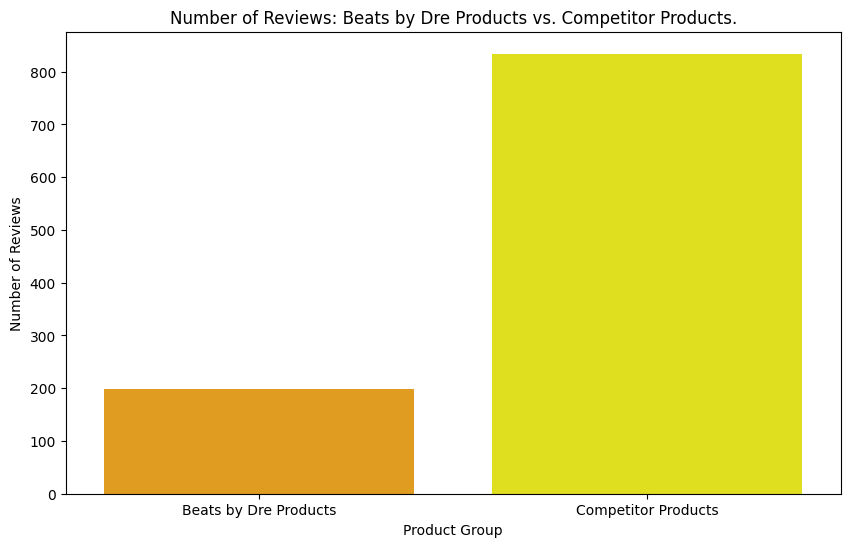

In [ ]:
# Plot the bar plot with custom colors
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Product Group', y = 'Count', data=review_counts_df, palette = custom_palette, hue = 'Product Group', dodge=False)
plt.title("Number of Reviews: Beats by Dre Products vs. Competitor Products.")
plt.xlabel('Product Group')
plt.ylabel('Number of Reviews')
plt.legend([],[], frameon = False)  # Hide the legend
plt.show()

- Distribution of Ratings using a **`histogram`**.

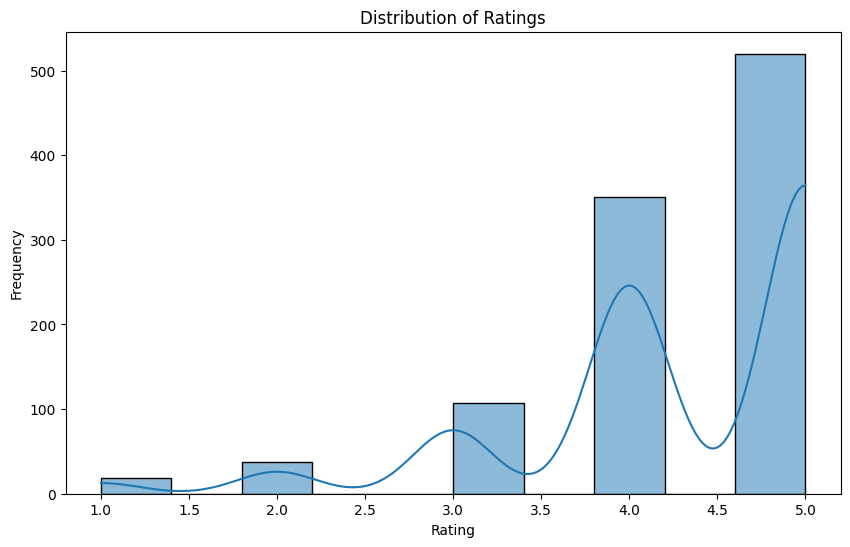

In [ ]:
plt.figure(figsize = (10, 6))
sns.histplot(my_df['rating'], bins = 10, kde = True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

```
Note: The histogram illustrates the distribution of ratings, which are mainly positive.
```

- Distribution of ratings using a **`violin plot`**.

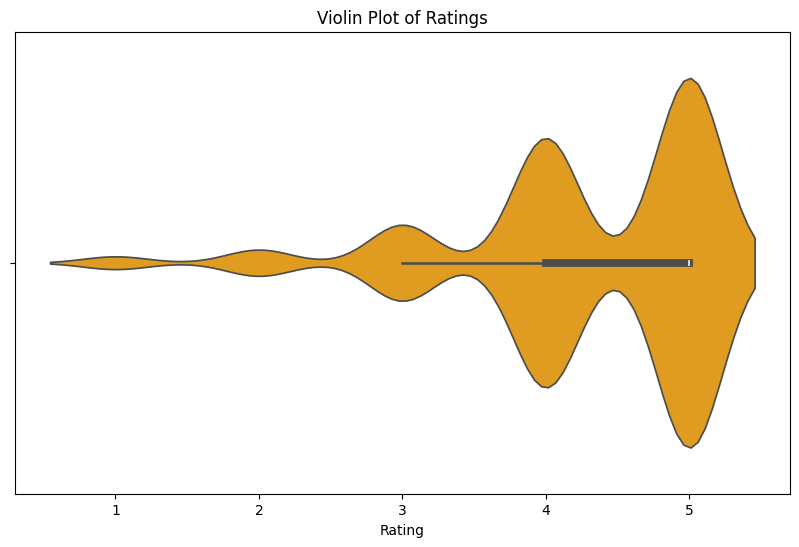

In [ ]:
# Violin plot for ratings
plt.figure(figsize=(10, 6))
sns.violinplot(x='rating', data= my_df, color = 'orange')
plt.title('Violin Plot of Ratings')
plt.xlabel('Rating')
plt.show()

```
 Note: The violin plot indicates that the majority of ratings are 4, 4.5, or 5, suggesting high satisfaction.
 ```

- **Correlation Matrix Heatmap**
    - **NB: We are working on a copy of the initial cleaned dataset because we need to convert some columns from string to numeric values.**

In [ ]:
# We made a copy of our cleaned data since we will convert some columns to numeric values.
my_copy_df = my_df.copy()

# Ensure 'content' column entries are strings and handle missing values
my_copy_df['content'] = my_copy_df['content'].fillna('').astype(str)

# Ensure 'rating' is numeric
my_copy_df['rating'] = pd.to_numeric(my_copy_df['rating'], errors = 'coerce')

# Convert 'content' to a sentiment score
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

my_copy_df['content'] = my_copy_df['content'].fillna('').astype(str).apply(get_sentiment)

# Convert 'is_verified' to numeric
my_copy_df['is_verified'] = my_copy_df['is_verified'].astype(int)

# Convert 'helpful_count' to numeric
my_copy_df['helpful_count'] = pd.to_numeric(my_copy_df['helpful_count'], errors = 'coerce')

# Calculate the correlation matrix
correlation_matrix = my_copy_df[['rating', 'content', 'is_verified', 'helpful_count']].corr()

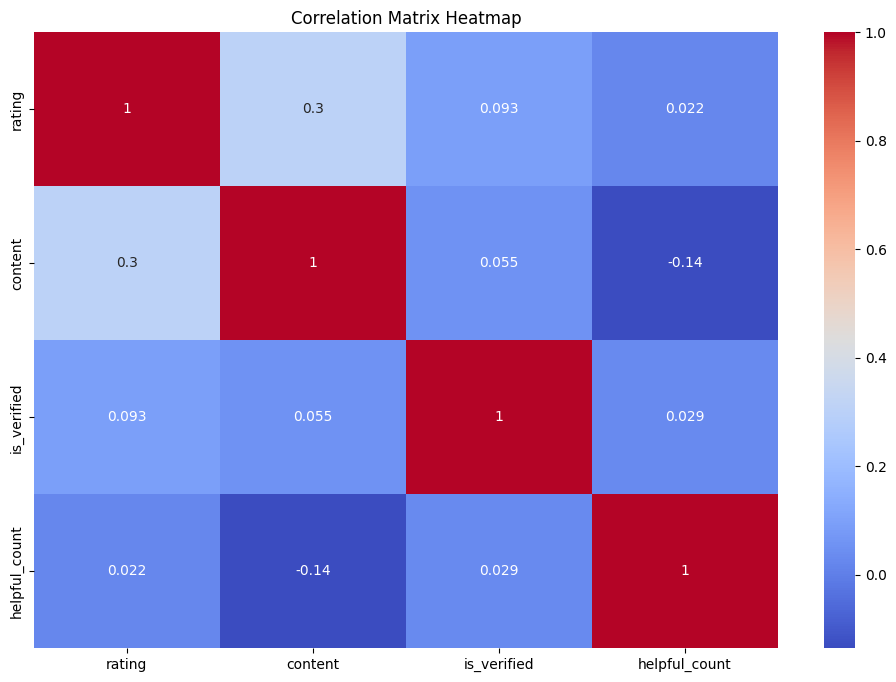

In [ ]:
# Plot the heatmap
plt.figure(figsize = (12, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

### **5. 3 Descriptive Statistics**
- **Descriptive Statistics**
  - The dataset consists of **`1,033`** reviews.
  - The average rating is **`4.28`**, which indicates general customer satisfaction.
  - The sentiment score has a mean of **`0.24`**, suggesting that the overall sentiment in the reviews is positive.
  - The `helpful_count` has a mean of **`1.39`**, indicating that on average, each review received a little over one helpful vote.

- **Number of Reviews**
  - Beats by Dre products have significantly fewer reviews (around 200) compared to competitor products (over 800). This is because we are analyzing only tow Beats's product compare to 9 competitors' products. penetration.

- **Distribution of Ratings**
  - Ratings are heavily skewed towards the higher end, with the majority of ratings being **`4`** or **`5`**.
  - There are very few ratings below **`3`**, indicating high customer satisfaction.

- **Violin Plot of Ratings**
  - The violin plot shows that most ratings are concentrated around **`4`** and **`5`**, with a few outliers at the lower end.
  - The distribution is quite tight around the higher ratings, reinforcing the observation of high customer satisfaction.

- **Correlation Analysis**
  - **Rating and Sentiment**: A moderate positive correlation `(0.3)` indicates that `more positive sentiment in review content is associated with higher ratings.`
  - **Rating and Is Verified**: A weak positive correlation `(0.093)` suggests that `verified purchases tend to have slightly higher ratings.`
  - **Rating and Helpful Count**: A very weak correlation `(0.022)` suggests that the number of helpful votes `is not strongly linked to ratings.`
  - **Sentiment and Helpful Count**: A weak negative correlation `(-0.14)` suggests that there the `relationship` between `customer sentiment` and `helpful count is not strong.`


```


## **6. Sentiment Analysis**

### **6. 1 Methodology**

Sentiment analysis was performed using TextBlob. Reviews were classified into positive, negative, and neutral sentiments.

- **Performing Sentiment Analysis with TextBlob.**

In [ ]:
# Ensure 'content' column entries are strings and handle missing values
my_df['content'] = my_df['content'].fillna('').astype(str)

# Perform sentiment analysis on the text reviews
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Assuming the dataset uses 'content' column for reviews
my_df['sentiment'] = my_df['content'].apply(get_sentiment)

# Classify the reviews into positive, negative, and neutral sentiments
my_df['sentiment_category'] = my_df['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

- **Classifying and Aggregating Sentiment Scores**

In [ ]:
# Classify the reviews into positive, negative, and neutral sentiments
my_df['sentiment_category'] = my_df['sentiment'].apply(lambda x: 'positive' if x and x > 0 else ('negative' if x and x < 0 else 'neutral'))

# Aggregate the sentiment scores to assess overall consumer sentiment
sentiment_counts = my_df['sentiment_category'].value_counts()

- **Visualizing Sentiment Distribution**

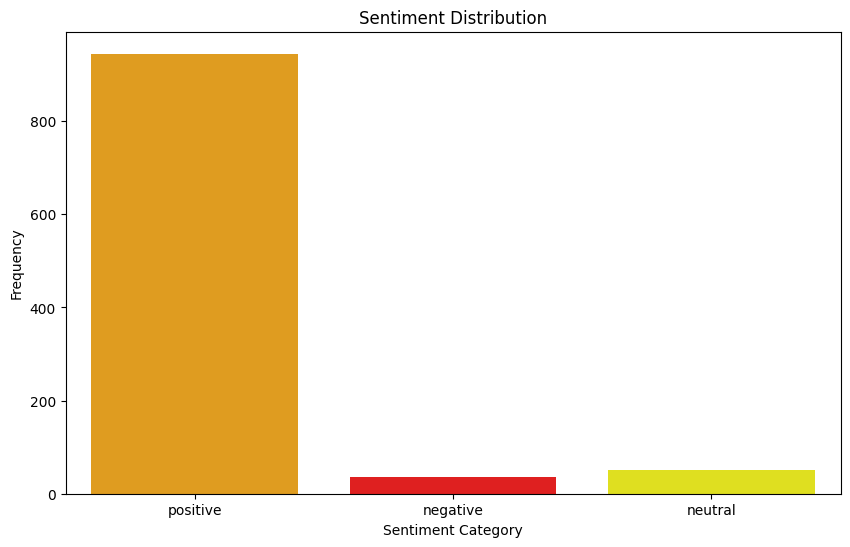

In [ ]:
# First, we have to define the color palette
palette = {
    'positive': 'orange',
    'negative': 'red',
    'neutral': 'yellow'
}

# Plotting the sentiment distribution
plt.figure(figsize = (10, 6))
sns.countplot(x = 'sentiment_category', hue = 'sentiment_category', data = my_df, palette = palette, dodge = False)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.show()

#### **6.2 Result**
The sentiment analysis results for Beats by Dre compared to its competitors reveal valuable insights. The `majority of reviews are positive`, with very few negative or neutral reviews. Both emphasize high audio quality and positive sentiment, using words like "good" and "great" to indicate overall satisfaction and ease of use

```


## **7. AI-Generated Insights**

### **7. 1 Using Gemini AI**

I used **Gemini AI** to identify areas where `customer expectations were not met` by searching for expressions of disappointment or unmet promises. I also sought to understand `how customers compare the product with competitors` by focusing on extracting these comparisons. In addition, I assessed `how product updates or changes have been received` by looking for mentions of these updates and customer reactions. This analysis was done using a function called `'analyze_reviews'` that takes three parameters `(reviews, api_key, prompt_template)` and returns insights after analyzing the `'content'` column of the reviews.

### **7. 2 Example Prompt followed by Generated Insights:**

- **Prompt 1:**
  - **Prompt:** `"From the following customer reviews, highlight instances where customer expectations were not met or promises were unfulfilled by Beats's products:\\n\\n" + "\\n\\n".join(reviews)`
  * **Insights:** Here are some instances where customer expectations were not met or promises were unfulfilled by Beats products based on the provided reviews:

      - **1. Beats Fit Pro:**

          * **Flimsy Case:** Several customers reported the case feeling cheap and flimsy, particularly the lid and hinge. This contradicts the expectation of a durable case for a premium product.
          * **Uneven Charging:** Some users experienced uneven charging between the earbuds, with one earbud charging slower than the other. This negatively impacts the usability of the product, as it can lead to one earbud dying before the other.
          * **Wingtips Discomfort:** Some users found the wingtips uncomfortable, especially for long periods of use or those with smaller ears. This contradicts the claim of a comfortable and secure fit.
          * **ANC Not as Effective:** A few customers were disappointed with the noise cancellation capabilities, finding it less effective than expected, especially compared to other brands.
          * **Volume Control Issues:** Some users found the volume controls fiddly and inconsistent, particularly when using buttons to control both volume and ANC/Transparency mode. This hampers the ease of use, especially during active use.
          * **No Wireless Charging:**  The lack of wireless charging was a common complaint, especially given the price point of the Beats Fit Pro.
          * **Short USB-C Cable:**  A short charging cable was included, requiring users to purchase a longer one separately.
          * **Durability Concerns:** Some reported the wingtips breaking or the ear tips getting stuck in their ears, highlighting potential durability issues.

      - **2. Beats Powerbeats Pro:**

          * **Charging Issues:**  Several users reported frequent issues with the charging case, where one or both earbuds wouldn't charge properly due to misalignment with the charging contacts. This is a significant design flaw that negatively impacts usability.
          * **Sound Quality:** Some customers felt the sound quality was "ho hum" and not as good as they expected for the price.
          * **Lack of Features:** The Powerbeats Pro lack features like noise cancellation and wireless charging that are present in other earbuds at a similar price point.

      - **3. Beats Studio Buds:**

          * **Flimsy Case:** The case was described as the "flimsiest" of all the tested earbuds, with a weak hinge that felt prone to breaking. This is a concern for durability and longevity.
          * **Fit Issues:** The Studio Buds were found to slip out of ears during workouts, compromising their intended use for active lifestyles.

      - **4. Beats Solo3 Wireless On-Ear Headphones:**

          * **Ear Cover Size:** Some users found the ear covers to be uncomfortable for extended periods due to not fully covering the ears, especially those with sensitive ears. This compromises the comfort advertised for the product.

      - **5. Other:**

          * **Battery Life:** Some customers were disappointed with the battery life, especially when using features like noise cancellation.
          * **Sound Quality:** A few reviews mentioned a lack of punchy bass, particularly for Beats, which are known for their bass-heavy sound.
          * **Mic Quality:**  Some customers reported issues with the microphone, with the other person on the call hearing excessive background noise.


- **Prompt 2:**
  - **Prompt:** `"From the following customer reviews, find examples of comparisons between Beats's products and their competitors:\\n\\n" + "\\n\\n".join(reviews)`
  * **Insights:** Here are some examples of comparisons between Beats products and their competitors found in the customer reviews:

      - **1. Beats Fit Pro vs. AirPods Pro:**

          * **Fit and Security:** Several reviewers mention the Beats Fit Pro's wingtip design as superior for a secure fit during workouts and running compared to the AirPods Pro, which are prone to falling out for some users.
          * **Noise Cancellation:** While some reviewers found the noise cancellation on Beats Fit Pro to be comparable to AirPods Pro, others felt the AirPods Pro offered better noise cancellation.
          * **Sound Quality:** Reviewers generally found the sound quality of both earbuds to be good, but some noted the AirPods Pro 2 had slightly better audio quality than the Beats Fit Pro.
          * **Features:** Beats Fit Pro and AirPods Pro share features like the H1 chip, transparency mode, and spatial audio, but Beats Fit Pro lack wireless charging and have a smaller, less durable case compared to AirPods Pro.

      - **2. Beats Fit Pro vs. Bose QuietComfort Earbuds:**

          * **Fit and Comfort:** Beats Fit Pro are consistently praised for their comfort and secure fit, especially during workouts, while the Bose QuietComfort Earbuds are described as heavy and less comfortable.
          * **Noise Cancellation:** Bose QuietComfort Earbuds are seen as having slightly better noise cancellation, but the Beats Fit Pro's noise cancellation is considered sufficient by many reviewers.
          * **Other Features:** Beats Fit Pro have physical buttons, which are preferred by many for control accuracy, while the Bose QuietComfort Earbuds use touch controls that can be unreliable.

      - **3. Beats Fit Pro vs. Powerbeats Pro:**

          * **Sound Quality:** The Beats Fit Pro are considered to have better sound quality than the Powerbeats Pro, especially in the mid-range and highs.
          * **Fit and Security:** Both have secure fit designs, but the Beats Fit Pro's wingtip design is seen as more comfortable for some.
          * **Features:** Beats Fit Pro offer noise cancellation and a more compact case, while Powerbeats Pro have a volume rocker and a hook design that wraps around the ear.

      - **4. Beats Fit Pro vs. Other Brands:**

          * **Physical Buttons:** A major selling point for Beats Fit Pro is their physical buttons, which are appreciated for their reliability and accuracy compared to touch controls on other earbuds.
          * **Fit and Stability:** The wingtip design of Beats Fit Pro is often mentioned as a significant advantage for secure fit during exercise, setting them apart from other earbuds that tend to fall out.
          * **Value for Money:** Several reviewers found the Beats Fit Pro to be a good value for the money compared to other brands, offering comparable sound quality and features at a lower price.

      - **5. Beats Fit Pro vs. Other Beats Products:**

          * **Beats Fit Pro vs. Beats Studio Buds:** The Beats Fit Pro are preferred for their secure fit during workouts, while the Beats Studio Buds are considered less stable.
          * **Beats Fit Pro vs. Powerbeats Pro:** While the Powerbeats Pro are popular for their hook design and secure fit for running, the Beats Fit Pro are seen as more comfortable and have better sound quality.



- **Prompt 3:**
  - **Prompt:** `"Analyze the following customer reviews to assess how Beats's products updates or changes have been received by customers:\\n\\n" + "\\n\\n".join(reviews)`
  * **Insights:** This analysis examines customer reviews to understand how Beats by Dre product updates and changes have been received by consumers. The reviews highlight both positive and negative feedback, focusing on key aspects like:

      - **1. Fit and Comfort:**

          * **Beats Fit Pro:** Reviews consistently praise the secure fit provided by the wingtips, making them ideal for active users like runners and gym-goers. However, some users with smaller ears find the wingtips uncomfortable or report fatigue after extended wear.
          * **Beats Studio Buds:** While comfortable, they are reported to fall out during workouts due to the lack of wingtips.
          * **Powerbeats Pro:** While lauded for their secure fit due to the hook design, some users experience discomfort or find them difficult to insert. Additionally, the charging case often causes issues.

      - **2. Sound Quality:**

          * **Beats Fit Pro:** Generally praised for excellent sound quality, especially the bass response. The adaptive EQ feature in the Beats app enhances the listening experience for many. Some users find the bass heavy, and some note the ANC isn't as impressive as on other high-end earbuds.
          * **Beats Studio Buds:** Customers appreciate the solid bass and overall sound quality, but it doesn't quite reach the same level as the Fit Pro.

      - **3. Noise Cancellation:**

          * **Beats Fit Pro:** The ANC is generally considered "good," but not the best in the market. It effectively blocks out low-frequency noises like mechanical hums, but struggles with higher-frequency noises and doesn't fully eliminate all ambient sound.
          * **Beats Studio Buds:** Similar to the Fit Pro, ANC performance is adequate but not exceptional.

      - **4. Features and Functionality:**

          * **Beats Fit Pro:** Highly appreciated for features like fast charging, transparency mode, and seamless integration with Apple devices. However, the lack of wireless charging is a common complaint, especially at this price point.
          * **Beats Studio Buds:** Some users mention better-than-average noise cancellation and appreciate the physical buttons. However, the flimsy case is a recurring issue.

      - **5. Case Quality:**

          * **Across all Beats models:** A consistent theme across multiple reviews is the lack of durability in the charging cases. They are often described as flimsy, prone to scratching, and not as robust as the cases offered by competitors like Apple.

      - **Overall Reception of Product Updates:**

          * **Beats Fit Pro:** The Fit Pro, being a newer model, seems to have received positive feedback overall, particularly from those seeking secure, comfortable earbuds for active lifestyles. However, the case quality and lack of wireless charging remain drawbacks.
          * **Beats Studio Buds:** The Studio Buds are generally well-received, but the lack of a secure fit for workouts and the flimsy case are deterrents for some.
          * **Powerbeats Pro:** Despite their age, they are still popular among those who value their secure fit. However, the charging issues are a significant drawback and prevent many from recommending them.

      - **Key Takeaways for Beats by Dre:**

          * **Prioritize Case Quality:** Addressing the durability issues of the charging cases is crucial to improve customer satisfaction.
          * **Enhance Noise Cancellation:** While the ANC performance is decent, investing in better technology would make the Fit Pro more competitive with rivals.
          * **Consider Wireless Charging:** Wireless charging is becoming increasingly expected at this price range, and its absence is a major disadvantage.
          * **Improve Fit and Comfort:** Further refining the fit and comfort of the Fit Pro, especially for users with smaller ears, is important to ensure a wider range of consumers find them comfortable.


## **7. 3 Interpretation:**

- **Customer Expectations and Unfulfilled Promises:**
  - **Durability Issues:** Flimsy and damage-prone cases.
  - **Charging Problems:** Uneven charging and misalignment.
  - **Comfort Concerns:** Issues with wingtips and ear covers affecting long-term wear.
  - **Feature Shortcomings:** Noise cancellation, volume controls, lack of wireless charging, and inadequate battery life did not meet expectations.

- **Comparisons with Competitors:**
  - **Fit and Features:** Secure fit and physical buttons of Beats Fit Pro are praised but lack wireless charging and durability compared to AirPods Pro and Bose QuietComfort Earbuds.
  - **Sound Quality and ANC:** Adequate but not superior noise cancellation and sound quality.
  - **Value for Money:** Generally good but some features and design elements fall short.

- **Reception of Product Updates:**
  - **Mixed Feedback:** Positive remarks for fit and sound quality in Beats Fit Pro, but criticisms for case durability and lack of wireless charging.
  - **Product-Specific Issues:** Beats Studio Buds noted for comfort but struggle with secure fit during workouts. Noise cancellation is adequate but not exceptional. Recurring flimsy charging cases are a concern.

- **Key Takeaways:**
  1. **Improve Case Quality:** Enhance durability of charging cases.
  2. **Enhance Noise Cancellation:** Invest in better ANC technology.
  3. **Consider Wireless Charging:** Add wireless charging to remain competitive.
  4. **Improve Fit and Comfort:** Refine fit for users with smaller ears.

```


## **8. Comparative Analysis**

### **8.1 Competitor Overview**

**Bose:**

* **Market Positioning:** Bose is consistently perceived as a leader in noise cancellation technology. Customers highlight the effectiveness of Bose's ANC, particularly in the QuietComfort series.
* **Strengths:**
    * Excellent noise cancellation
    * Good sound quality
    * Durable cases
* **Weaknesses:**
    * Some customers find Bose earbuds heavy and uncomfortable
    * Discontinued the popular QuietComfort 20 Headphones, causing frustration
    * Some users report "boom boom" sensations when walking with the wireless QuietComfort Earbuds
    * Touch controls can be overly sensitive

**Sony:**

* **Market Positioning:**  Sony is praised for its sound quality, especially for audiophiles.  However, some find their earbuds lacking in fit and stability for active lifestyles.
* **Strengths:**
    * Superior sound quality (audiophile-focused)
    * Good noise cancellation
    * Transparent mode
* **Weaknesses:**
    * Fit and stability are often criticized for active use
    *  May not be as comfortable for prolonged wear

**JBL:**

* **Market Positioning:** JBL is recognized for its affordability and decent sound quality, particularly for bass-heavy music.  However, they are often criticized for lacking features and falling short of premium brands in terms of sound quality and noise cancellation.
* **Strengths:**
    * Affordable price point
    * Good bass response
    * Decent battery life
    * Many models are sweat-proof and water-resistant
* **Weaknesses:**
    * Sound quality is often perceived as less refined than premium brands
    * Noise cancellation is not as effective as Bose or Sony
    * Touch controls can be sensitive and unreliable
    * Cases can feel flimsy and lack wireless charging


**Sennheiser:**

* **Market Positioning:** Sennheiser is known for its high-quality audio and features, often attracting audiophiles. Some customers note their earbuds offer excellent sound quality and a multitude of features, but the price tag can be a deterrent.
* **Strengths:**
    *  High-quality audio
    * Extensive features
* **Weaknesses:**
    * Price point is considered high
    * Some models might not fit as well in ears
    *  Touch controls can be finicky

**Overall:**

Beats by Dre is a strong competitor in the earbud market, especially appealing to those seeking Apple ecosystem integration, comfortable fit, and good sound quality. However, they face tough competition from brands like Bose, Sony, and Sennheiser. While Beats stands out for its comfort and Apple integration, improvements in case quality and battery life are needed to compete at the top tier.

### **8.2 Comparison of Sentiments.**

- `Word Cloud` of Reviews for `Beats By Dre's Products`.

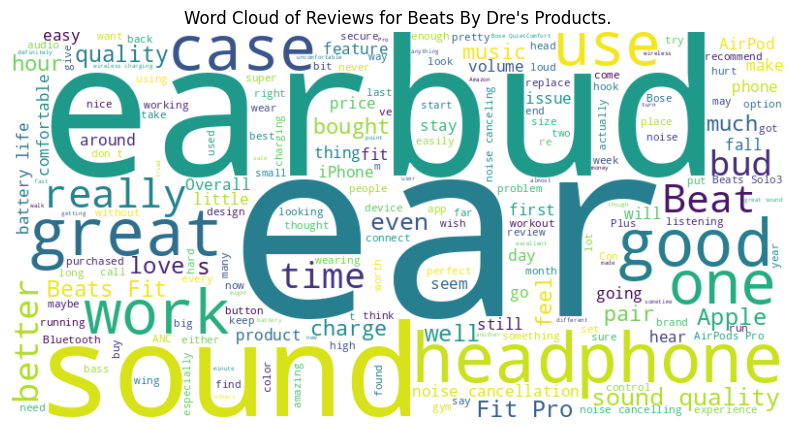

In [ ]:
# Combine all reviews for specified products into one string
specified_reviews_text = ' '.join(specified_reviews['content'].dropna().astype(str))

# Generate the word cloud for specified products
specified_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(specified_reviews_text)

# Display the word cloud for specified products
plt.figure(figsize=(10, 6))
plt.imshow(specified_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Reviews for Beats By Dre's Products.")
plt.show()

- `Word Cloud` of Reviews for `Beats Competitors' Products`.

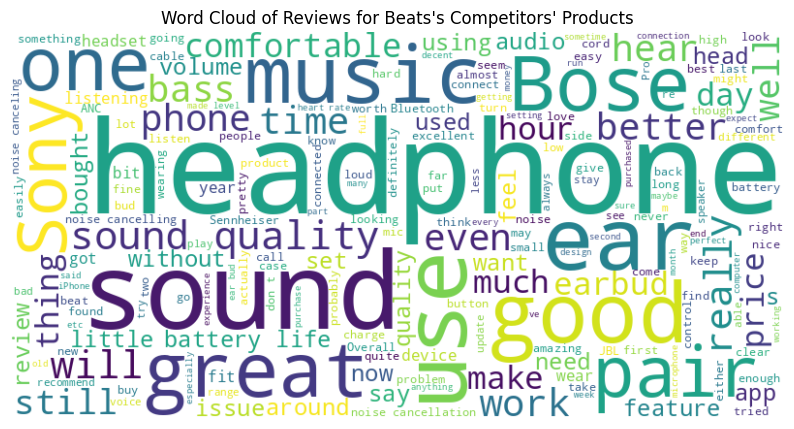

In [ ]:
# Combine all reviews for other products into one string
other_reviews_text = ' '.join(other_reviews['content'].dropna().astype(str))

# Generate the word cloud for other products
other_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(other_reviews_text)

# Display the word cloud for other products
plt.figure(figsize = (10, 6))
plt.imshow(other_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Reviews for Beats's Competitors' Products")
plt.show()

Now, let's compare the sentiment analysis results of Beats by Dre with those of its competitors.
- **Beats by Dre Word Cloud**

  - **Prominent Words:**
    - **Ear, Earbud, Sound**: These words indicate that users frequently discuss Beats products' physical aspects and audio quality.
    - **Headphone, Use, Great**: Positive sentiment words suggesting satisfaction with the usage and overall product quality.
    - **Good, Better, Product**: General positive feedback on the products.
    - **Noise Cancellation, Quality, Pair**: Indicates features users value and frequently comment on.
    - **AirPod, Fit Pro, Apple**: Specific product mentions, showing a high recognition of related brands and products.

- **Competitors' Products Word Cloud**

  - **Prominent Words:**
    - **Headphone, Sound, Ear**: Similar focus on the physical product and audio quality, like Beats.
    - **Good, Great, Quality**: Positive sentiment words similar to those found in the Beats word cloud.
    - **Use, Pair, Really**: Suggesting ease of use and general satisfaction.
    - **Bose, Sony, Music**: Specific brands mentioned, indicating strong competitors.
    - **Price, Bass, Comfortable**: Cost, sound features, and comfort are emphasized.

- **Comparative Analysis**

  - **Similarities:**
    1. **Focus on Audio Quality**: Both word clouds prominently feature words related to sound and headphones, indicating that audio quality is a key factor for users of both Beats and its competitors.
    2. **Positive Sentiment**: Words like "good," "great," and "quality" are common in both word clouds, suggesting general satisfaction with the products from both Beats and its competitors.
    3. **Ease of Use**: Words like "use" and "pair" are frequent in both word clouds, highlighting the importance of user-friendliness.

  - **Differences:**
    1. **Brand Recognition**: The Beats word cloud mentions specific Beats-related products (e.g., "AirPod," "Fit Pro"), while the competitors' word cloud mentions competitor brands (e.g., "Bose," "Sony").
    2. **Features vs. Price**: The Beats word cloud includes feature-specific words like "noise cancellation," whereas the competitors' word cloud includes "price," suggesting that cost is a significant factor in the competitors' reviews.
    3. **Comfort and Bass**: The competitors' word cloud has words like "comfortable" and "bass," indicating these aspects might be more prominent in competitors' reviews than Beats.

### **8.3 SWOT Analysis**
**Strengths:**
- **Sound Quality:** Praised for bass response and clarity across genres.
- **Fit and Security:** Wingtip design ensures secure fit during intense activities.
- **Comfort:** Comfortable for extended wear.
- **Apple Ecosystem Integration:** Seamless with Apple devices; features automatic pairing, Siri compatibility, and spatial audio.
- **Physical Buttons:** Reliable for playback, volume, and noise cancellation control.

**Weaknesses:**
- **Case Durability and Design:** Criticized for being flimsy, easily scratched, and lacking wireless charging.
- **Noise Cancellation:** Not consistently top-rated, sometimes subpar compared to brands like Bose.
- **Volume:** Insufficient maximum volume for some users.
- **Battery Life:** Good but could be longer, especially with noise cancellation.
- **Price:** Considered high, especially with some shortcomings.

**Opportunities:**
- **Improved Case:** More durable, with wireless charging.
- **Enhanced Noise Cancellation:** Better performance in loud environments.
- **Customizable EQ:** Robust equalizer in the app for personalized sound.
- **Android Compatibility:** Expanding features for Android users.
- **Product Line Expansion:** New color options and features like multipoint connectivity.

**Threats:**
- **Competition:** Strong from brands like Bose, Sony, and Apple.
- **Customer Perception:** Some view Beats as overpriced with mediocre quality.
- **Battery Life and Durability:** Increasing demands for longer battery life and durability.
- **Shifting Consumer Preferences:** Need to stay responsive to trends.
- **Economic Factors:** Downturns and inflation may lead to preference for budget options.

```


## **9. Strategic Recommendations**

### **9. 1 Product Improvements**


**1. Charging Case:**
- **Durability:** Customers find the case flimsy and prone to damage; consider using more robust materials.
- **Wireless Charging:** Add wireless charging to improve user experience.
- **Case Size:** Some users find it too big; explore more compact designs.
- **Uneven Charging:** Improve the charging mechanism to ensure even charging for both earbuds.

**2. Earbud Fit and Comfort:**
- **Wing Tip Design:** Offer more wing tip sizes for better comfort, especially for smaller ears.
- **Ear Tip Size Options:** Provide additional ear tip options and consider alternative materials like memory foam.

**3. Sound Quality and Features:**
- **ANC Performance:** Enhance ANC technology for a more immersive experience.
- **Bass Response:** Improve bass response for better performance in bass-heavy music genres.
- **Spatial Audio:** Offer customizable options for spatial audio settings.
- **Volume Control:** Improve the reliability of volume controls.
- **Phone Call Quality:** Enhance microphone quality to reduce background noise during calls.

**4. General Improvements:**
- **Battery Life:** Optimize battery consumption for longer usage, especially with ANC.
- **Multipoint Connectivity:** Add multipoint connectivity for seamless device switching.
- **Warranty:** Ensure consistent and clear warranty information.
- **Pricing:** Consider more competitive pricing strategies.

**5. Software Features:**
- **Beats App:** Add customizable options like EQ settings and improved ANC controls.
- **Android Compatibility:** Improve compatibility and integration with Android devices.

### **9.2 Marketing Strategies.**

**1. Address Common Concerns & Highlight Strengths:**

- **Fit and Comfort:**
  - **Secure Fit:** Emphasize the "wingtip" design benefits for active lifestyles.
  - **Fitting Tips:** Use visuals and video tutorials for proper placement and sizing.
  - **Alternative Solutions:** Mention aftermarket ear tips or introduce new options for various ear shapes.

- **Case Durability:**
  - **Durability:** Emphasize the case's durability in marketing materials.
  - **Protective Case:** Offer a Beats-branded protective case as an optional accessory.

- **Battery Life:**
  - **Fast Charging:** Highlight the "Fast Fuel" feature.
  - **Realistic Expectations:** Mention how features like noise cancellation impact battery life.
  - **Warranty Upgrade:** Consider a battery-specific warranty.

- **Sound Quality:**
  - **Positive Feedback:** Highlight the "powerful and bass-heavy" sound.
  - **Demos:** Use high-quality audio samples and videos.

**2. Emphasize Apple Ecosystem Integration:**

- **H1 Chip Benefits:** Focus on seamless pairing, low latency, and features like "Find My" and Siri compatibility.
- **Target Apple Users:** Market directly to Apple users, highlighting compatibility benefits.

### **9.3 Future Research**

1. **Comfort and Fit**:
   - Collect data on ear shape, size, and factors like glasses or ear piercings.
   - Research the correlation between these factors and comfort/stability, especially for glasses wearers.

2. **Performance Feedback**:
   - Gather ratings on ANC effectiveness in various environments and detailed sound quality feedback (e.g., bass, treble).
   - Compare Beats Fit Pro's ANC and sound quality to competitors, and explore customer preferences for sound signatures.

3. **Product Usability and Durability**:
   - Track actual battery life in different scenarios and investigate charging issues.
   - Collect feedback on the charging case's durability and conduct durability tests.
   - Survey the integration with Apple devices and compare usability with AirPods Pro, focusing on enhancing features like automatic ear detection and multipoint connectivity.

```


## **10. Conclusion**

The analysis indicates that Beats By Dre has high customer satisfaction, as shown by their excellent ratings and positive feedback in reviews.

**Positive Aspects:**
The wingtip design ensures a secure fit, especially beneficial during workouts and for users with smaller ears. High praise for sound quality, with powerful bass and clear audio, often rated better than competitors like AirPods. Physical buttons are preferred by users for reliability and precision, especially during active use. Seamless connectivity with Apple devices, thanks to the H1 chip, is a major selling point for Apple ecosystem users.

**Negative Aspects:**
Many users find the charging case flimsy and prone to damage. Active Noise Cancellation (ANC) is not consistently seen as top-tier compared to brands like Bose. The high price point is a common concern among users. Some users desire longer battery life for extended use.

**Implications for Product Development:**
Highlight the secure fit in marketing and provide clear fitting instructions. Use sturdier materials or offer a more robust case option. Improving ANC performance could provide a competitive advantage. Address price concerns with competitive pricing or promotions.

**Strategic Marketing Focus:**
Target Apple users by emphasizing strong integration and compatibility with Apple devices.

```


## **11. References**

#### **Data Sources**
Amazon Customer Reviews: Reviews for Beats by Dre products collected from Amazon.

Sure, here is the revised citation list:

#### **Tools and Libraries**
- **Python Libraries:** Used for data analysis and visualization.
  - Pandas
  - Matplotlib
  - Seaborn
  - TextBlob
  - WordCloud
  - NLTK
  - NumPy

- **Oxylabs:** Used for data scraping.
- **Google Generative AI (PaLM API):** Used for AI-related tasks.

- **Google Colab:** Used as the development environment for running and sharing the project.

```
